In [4]:
import requests
import base64
import datetime 
import spotipy
import pandas as pd
from spotipy.oauth2 import SpotifyClientCredentials

In [ ]:
<iframe src="https://open.spotify.com/embed/playlist/1MCXV57pNJkJy4EQPLBzn0" width="300" height="380" frameborder="0" allowtransparency="true" allow="encrypted-media"></iframe>

In [5]:
CLIENT_ID = '45844a803da249adae64a637787bfd7e'
CLIENT_SECRET = 'dc6e854038474d0ab8ed4faacc9d3080'

PLAYLIST_ID = '1MCXV57pNJkJy4EQPLBzn0' # Spotify playlist id

# API Login
client_credentials_manager = SpotifyClientCredentials(client_id=CLIENT_ID, client_secret=CLIENT_SECRET)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager) #spotify object to access API

# Getting tracks of the playlist
tracks = sp.user_playlist_tracks(user = 'spotify', playlist_id = PLAYLIST_ID)
tracks_uri_list = [x['track']['uri'] for x in tracks['items']]

# Getting features of tracks
features = []
for i in tracks_uri_list:
    features = features + sp.audio_features(i)

# Creating feature dataframe
cols_to_drop = ['id', 'analysis_url', 'key', 'time_signature', 'track_href', 'type', 'uri', 'mode', 'duration_ms']
features_df = pd.DataFrame(features).drop(cols_to_drop, axis=1)

array([[<AxesSubplot:title={'center':'danceability'}>,
        <AxesSubplot:title={'center':'energy'}>,
        <AxesSubplot:title={'center':'loudness'}>],
       [<AxesSubplot:title={'center':'speechiness'}>,
        <AxesSubplot:title={'center':'acousticness'}>,
        <AxesSubplot:title={'center':'instrumentalness'}>],
       [<AxesSubplot:title={'center':'liveness'}>,
        <AxesSubplot:title={'center':'valence'}>,
        <AxesSubplot:title={'center':'tempo'}>]], dtype=object)

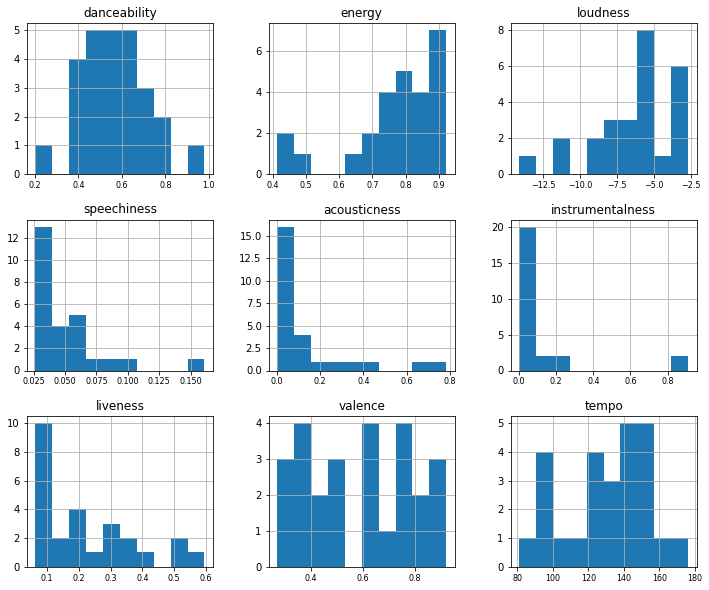

In [6]:
features_df.hist(xlabelsize=8, figsize=(12,10))

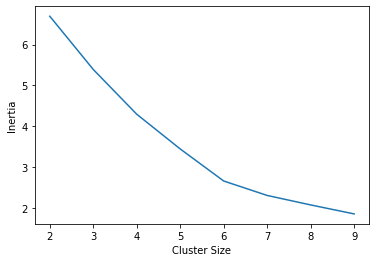

In [7]:
from sklearn.cluster import KMeans

# Scaling
for col in ['loudness', 'tempo']:
    features_df[col] = ((features_df[col] - features_df[col].min()) / (features_df[col].max() - features_df[col].min()))

# Determining the cluster size
score_list = []
for i in range(2,10):
    kmeans_model = KMeans(n_clusters=i, random_state=3).fit(features_df)
    preds = kmeans_model.predict(features_df)
    score_list.append(kmeans_model.inertia_)

# Visualization of different cluster size performations
pd.DataFrame(score_list, index=range(2, 10)).plot(legend=False).set(xlabel="Cluster Size", ylabel="Inertia")

# Training and Predicting
kmeans_model = KMeans(n_clusters=5, random_state=3).fit(features_df)
preds = kmeans_model.predict(features_df)

In [8]:
# Extracting song and artist names
songs = [x['track']['name'] for x in tracks['items']]
artists = [x['track']['artists'] for x in tracks['items']]

# Concatenating multiple artist names
artist_list = []
for group in artists:
    artist_group = []
    for person in group:
        artist_group.append(person['name'])
    artist_list.append(', '.join(artist_group))

# Adding predictions to dataframe
features_df['cluster'] = preds

# Grouping clusters to see the averages
clusters = features_df \
    .groupby('cluster') \
    .agg('mean')

In [22]:
clusters

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
cluster,,,,,,,,,
0,0.546500,0.578000,0.148992,0.044400,0.055650,0.029660,0.129500,0.298000,0.231533
1,0.490800,0.847100,0.845370,0.047660,0.103499,0.050621,0.267980,0.453000,0.435378
2,0.585625,0.800625,0.658811,0.058588,0.030977,0.013738,0.180188,0.743125,0.733038
3,0.422000,0.811000,0.784542,0.034450,0.066885,0.891500,0.252700,0.494500,0.628861
4,0.789000,0.585000,0.561469,0.057225,0.462275,0.035091,0.223250,0.831250,0.353231


In [10]:
artist_list

['The Strokes',
 'girl in red',
 'Dayglow',
 'Dominic Fike',
 'Pixies',
 'Public Access T.V.',
 'The Clash',
 'Calpurnia',
 'The Neighbourhood',
 'Hinds',
 'The Beatles',
 'Muse',
 'Belako',
 'Surf Curse',
 'Oasis',
 'The Strokes',
 'The Neighbourhood',
 'The Parrots',
 'Sun Room',
 'Hinds',
 '347aidan',
 'SG Lewis, Clairo',
 'Boza',
 'InnerCut, Juancho Marqués, Pedro LaDroga',
 'Geek Music',
 'Phil Collins']

In [11]:
preds

array([2, 0, 3, 2, 0, 1, 2, 1, 4, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 3, 4, 4,
       4, 2, 2, 2], dtype=int32)

In [13]:
songs

['The Adults Are Talking',
 'rue',
 'Can I Call You Tonight?',
 'Double Negative (Skeleton Milkshake)',
 'Where Is My Mind?',
 'In Love and Alone',
 'Spanish Bombs - Remastered',
 'Wasting Time',
 "Devil's Advocate",
 'Waiting For You',
 'Hello, Goodbye - Remastered 2015',
 'Time is Running Out',
 'Tie Me Up',
 'Heathers',
 'Bag It Up',
 'Bad Decisions',
 'Sweater Weather',
 'No me gustas, te quiero',
 'Just Yesterday',
 'Easy',
 'Dancing in My Room',
 'Throwaway (with Clairo)',
 "Hecha Pa' Mi",
 '1996',
 'Tarzan: Son Of Man',
 'Son of Man']

In [33]:
features_df.head()

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,cluster
0,0.593,0.749,0.738675,0.0475,0.01160,0.108000,0.314,0.650,0.882740,2
1,0.575,0.720,0.297984,0.0539,0.09560,0.058700,0.180,0.326,0.463066,0
2,0.641,0.842,0.599110,0.0292,0.13200,0.910000,0.419,0.500,0.515486,3
3,0.689,0.858,0.983329,0.1610,0.00383,0.000000,0.129,0.643,0.767423,2
4,0.518,0.436,0.000000,0.0349,0.01570,0.000621,0.079,0.270,0.000000,0


In [32]:
artist_group

['Phil Collins']

In [23]:
features

[{'danceability': 0.593,
  'energy': 0.749,
  'key': 5,
  'loudness': -5.671,
  'mode': 1,
  'speechiness': 0.0475,
  'acousticness': 0.0116,
  'instrumentalness': 0.108,
  'liveness': 0.314,
  'valence': 0.65,
  'tempo': 164.961,
  'type': 'audio_features',
  'id': '5ruzrDWcT0vuJIOMW7gMnW',
  'uri': 'spotify:track:5ruzrDWcT0vuJIOMW7gMnW',
  'track_href': 'https://api.spotify.com/v1/tracks/5ruzrDWcT0vuJIOMW7gMnW',
  'analysis_url': 'https://api.spotify.com/v1/audio-analysis/5ruzrDWcT0vuJIOMW7gMnW',
  'duration_ms': 309053,
  'time_signature': 4},
 {'danceability': 0.575,
  'energy': 0.72,
  'key': 4,
  'loudness': -10.72,
  'mode': 0,
  'speechiness': 0.0539,
  'acousticness': 0.0956,
  'instrumentalness': 0.0587,
  'liveness': 0.18,
  'valence': 0.326,
  'tempo': 124.987,
  'type': 'audio_features',
  'id': '6lhuBaygBqxBjdcXrM685k',
  'uri': 'spotify:track:6lhuBaygBqxBjdcXrM685k',
  'track_href': 'https://api.spotify.com/v1/tracks/6lhuBaygBqxBjdcXrM685k',
  'analysis_url': 'https://ap

In [24]:
tracks

{'href': 'https://api.spotify.com/v1/playlists/1MCXV57pNJkJy4EQPLBzn0/tracks?offset=0&limit=100&additional_types=track',
 'items': [{'added_at': '2020-12-10T15:59:07Z',
   'added_by': {'external_urls': {'spotify': 'https://open.spotify.com/user/1195145834'},
    'href': 'https://api.spotify.com/v1/users/1195145834',
    'id': '1195145834',
    'type': 'user',
    'uri': 'spotify:user:1195145834'},
   'is_local': False,
   'primary_color': None,
   'track': {'album': {'album_type': 'album',
     'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/0epOFNiUfyON9EYx7Tpr6V'},
       'href': 'https://api.spotify.com/v1/artists/0epOFNiUfyON9EYx7Tpr6V',
       'id': '0epOFNiUfyON9EYx7Tpr6V',
       'name': 'The Strokes',
       'type': 'artist',
       'uri': 'spotify:artist:0epOFNiUfyON9EYx7Tpr6V'}],
     'available_markets': ['AD',
      'AE',
      'AL',
      'AR',
      'AT',
      'AU',
      'BA',
      'BE',
      'BG',
      'BH',
      'BO',
      'BR',
      '

In [25]:
tracks_uri_list

['spotify:track:5ruzrDWcT0vuJIOMW7gMnW',
 'spotify:track:6lhuBaygBqxBjdcXrM685k',
 'spotify:track:64lsIF5pw0sJY0gV5kz0RN',
 'spotify:track:7ACT6YaXbYvl7hRWEOOEHQ',
 'spotify:track:6mcxQ1Y3uQRU0IHsvdNLH1',
 'spotify:track:2aKY45OwWSO05U1xOhEv0T',
 'spotify:track:6wtmql7FJ7SSLuSw8JD8rX',
 'spotify:track:0vHe71HY2buXnbwDnN8dLo',
 'spotify:track:4XfI7M5gLwEY84gYiH4RDD',
 'spotify:track:1mPu0VzVej4kJBKHKu9rHI',
 'spotify:track:0hqjsgWRfMBf2s8xsvRq1M',
 'spotify:track:2takcwOaAZWiXQijPHIx7B',
 'spotify:track:28OMRH5FtMwvcMoT3jktct',
 'spotify:track:14B9WdVCUXs2WMmCTNRT6t',
 'spotify:track:4POUspfY5OfIq0OvWebitV',
 'spotify:track:55N8cxpE1QDoeaaNqUnoZ2',
 'spotify:track:2QjOHCTQ1Jl3zawyYOpxh6',
 'spotify:track:6kUKZYFq5UGC1xjqVjXVT6',
 'spotify:track:61nObymv4jlyNVc0ukiFPn',
 'spotify:track:4Rxv4AEzmqENnPrdUvd6TY',
 'spotify:track:6Pgmqg15yVexuOgtzuxwoX',
 'spotify:track:2MnEG4htbbdfoUsyzxZ4BM',
 'spotify:track:3VvA1wSxukMLsvXoXtlwWx',
 'spotify:track:6QuXvDSvHHnEqs4MhXKbGG',
 'spotify:track:

In [27]:
score_list

[6.690733876782963,
 5.390845124416039,
 4.297736392123932,
 3.449639159675855,
 2.6668731550026337,
 2.314284482793036,
 2.082759117117505,
 1.8633677663257104]